In [564]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [530]:
df = pd.read_excel("../Data/raw_synthetic_health_dataset.xlsx")

In [531]:
df.head(10)

,Gender,Smoking,Alcohol_Consumption,Exercise_Frequency,Blood_Pressure,Cholesterol_Level,Stress_Level,Age,BMI,Heart_Rate,Sleep_Hours,Blood_Sugar_Level,Medication_Use,Family_History,Illness
0,Female,No,Moderate,Never,Normal,Borderline,High,90.0,16.6,119.0,3.6,143.6,NaN,No,Yes
1,Other,Yes,NaN,Never,Normal,Normal,Low,20.0,29.9,69.0,9.9,121.8,NaN,Yes,No
2,Male,Yes,Heavy,Daily,High,High,Low,52.0,33.5,54.0,8.5,107.0,NaN,Yes,Yes
3,Male,Yes,Heavy,Daily,Normal,High,Low,15.0,20.3,72.0,9.5,92.1,NaN,No,Yes
4,Male,No,Moderate,Often,High,High,Medium,60.0,36.0,58.0,4.4,113.6,NaN,No,Yes
5,Male,No,NaN,Daily,Low,High,High,53.0,15.8,107.0,9.7,149.0,Occasional,No,No
6,Male,Yes,NaN,Daily,Low,Borderline,Low,39.0,36.1,108.0,4.0,144.9,Occasional,Yes,Yes
7,Male,No,NaN,Daily,Normal,Borderline,High,25.0,26.5,103.0,6.6,91.3,Occasional,Yes,Yes
8,Male,No,Moderate,Never,High,Borderline,Medium,79.0,20.4,95.0,8.8,86.2,Occasional,No,Yes
9,Female,Yes,NaN,Never,High,High,Medium,91.0,18.3,71.0,5.4,73.5,Regular,No,No


In [532]:
df.shape

(1000, 15)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               988 non-null    object 
 1   Smoking              993 non-null    object 
 2   Alcohol_Consumption  649 non-null    object 
 3   Exercise_Frequency   993 non-null    object 
 4   Blood_Pressure       990 non-null    object 
 5   Cholesterol_Level    993 non-null    object 
 6   Stress_Level         995 non-null    object 
 7   Age                  992 non-null    float64
 8   BMI                  994 non-null    float64
 9   Heart_Rate           992 non-null    float64
 10  Sleep_Hours          994 non-null    float64
 11  Blood_Sugar_Level    997 non-null    float64
 12  Medication_Use       655 non-null    object 
 13  Family_History       995 non-null    object 
 14  Illness              1000 non-null   object 
dtypes: float64(5), object(10)
memory usage:

In [534]:
df.isnull(). sum()

Gender                  12
Smoking                  7
Alcohol_Consumption    351
Exercise_Frequency       7
Blood_Pressure          10
Cholesterol_Level        7
Stress_Level             5
Age                      8
BMI                      6
Heart_Rate               8
Sleep_Hours              6
Blood_Sugar_Level        3
Medication_Use         345
Family_History           5
Illness                  0
dtype: int64

In [535]:
df.duplicated().sum()

np.int64(0)

In [536]:
df.columns

Index(['Gender', 'Smoking', 'Alcohol_Consumption', 'Exercise_Frequency', 'Blood_Pressure', 'Cholesterol_Level', 'Stress_Level', 'Age', 'BMI', 'Heart_Rate', 'Sleep_Hours', 'Blood_Sugar_Level', 'Medication_Use', 'Family_History', 'Illness'], dtype='object')

In [537]:
df.describe()

,Age,BMI,Heart_Rate,Sleep_Hours,Blood_Sugar_Level
count,992.000000,994.000000,992.000000,994.000000,997.000000
mean,49.541331,27.408048,85.076613,6.588632,135.663089
std,28.807834,7.238667,20.237096,2.037919,37.145081
min,0.000000,15.100000,50.000000,3.000000,70.200000
25%,24.000000,21.100000,68.000000,4.800000,104.600000
50%,50.000000,27.350000,85.000000,6.650000,136.300000
75%,75.000000,33.600000,104.000000,8.400000,168.700000
max,99.000000,40.000000,119.000000,10.000000,200.000000


In [538]:
df['Illness'].value_counts()

Illness
No     510
Yes    490
Name: count, dtype: int64

In [539]:
df['Gender'].value_counts()

Gender
Male      336
Female    326
Other     326
Name: count, dtype: int64

In [540]:
df['Gender'] = df['Gender'].ffill()
df['Gender'].value_counts()

Gender
Male      338
Female    332
Other     330
Name: count, dtype: int64

In [541]:
df['Smoking'].value_counts(dropna=False)

Smoking
No     510
Yes    483
NaN      7
Name: count, dtype: int64

In [542]:
df['Smoking'] = df['Smoking'].bfill()
df['Smoking'].value_counts(dropna=False)

Smoking
No     513
Yes    487
Name: count, dtype: int64

In [543]:
df['Alcohol_Consumption'].value_counts(dropna=False)

Alcohol_Consumption
NaN         351
Moderate    336
Heavy       313
Name: count, dtype: int64

In [544]:
df['alcohol_missing_flag'] = df['Alcohol_Consumption'].isnull().astype(int)

In [545]:
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('Unkonown')
df['Alcohol_Consumption'].value_counts(dropna=False)

Alcohol_Consumption
Unkonown    351
Moderate    336
Heavy       313
Name: count, dtype: int64

In [546]:
df['Exercise_Frequency'].value_counts(dropna=False)

Exercise_Frequency
Never     258
Daily     248
Often     248
Rarely    239
NaN         7
Name: count, dtype: int64

In [547]:
df['Exercise_Frequency'] = df['Exercise_Frequency'].bfill()
df['Exercise_Frequency'].value_counts(dropna=False)

Exercise_Frequency
Never     260
Daily     249
Often     249
Rarely    242
Name: count, dtype: int64

In [548]:
df['Blood_Pressure'].value_counts(dropna=False)

Blood_Pressure
Normal    342
Low       336
High      312
NaN        10
Name: count, dtype: int64

In [549]:
df['Blood_Pressure'] = df['Blood_Pressure'].bfill()
df['Blood_Pressure'].value_counts(dropna=False)

Blood_Pressure
Normal    345
Low       338
High      317
Name: count, dtype: int64

In [550]:
df['Cholesterol_Level'].value_counts(dropna=False)

Cholesterol_Level
High          342
Borderline    340
Normal        311
NaN             7
Name: count, dtype: int64

In [551]:
df['Cholesterol_Level'] = df['Blood_Pressure'].bfill()
df['Cholesterol_Level'].value_counts(dropna=False)

Cholesterol_Level
Normal    345
Low       338
High      317
Name: count, dtype: int64

In [552]:
df['Stress_Level'].value_counts(dropna=False)

Stress_Level
High      346
Medium    328
Low       321
NaN         5
Name: count, dtype: int64

In [553]:
df['Stress_Level'] = df['Stress_Level'].bfill()
df['Stress_Level'].value_counts(dropna=False)

Stress_Level
High      347
Medium    331
Low       322
Name: count, dtype: int64

In [554]:
sel_col = ['Age', 'BMI', 'Heart_Rate', 'Sleep_Hours', 'Blood_Sugar_Level']
for col in sel_col:
    df[col] = df[col].fillna(df[col].mean())
    print(f'{col}:{df[col].isna().sum()}')

Age:0
BMI:0
Heart_Rate:0
Sleep_Hours:0
Blood_Sugar_Level:0


In [555]:
df['medication_missing_flag'] = df['Medication_Use'].isna().astype(int)

In [556]:
df['Medication_Use'] = df['Medication_Use'].fillna('Unknown')

In [557]:
df['Family_History'].value_counts(dropna=False)

Family_History
No     511
Yes    484
NaN      5
Name: count, dtype: int64

In [558]:
df['Family_History'] = df['Family_History'].ffill()
df['Family_History'].value_counts(dropna=False)

Family_History
No     514
Yes    486
Name: count, dtype: int64

In [559]:
df['minor_smoking_flag'] = (
    (df['Age'] < 16) &
    (df['Smoking'] == 'Yes')
).astype(int)
df.loc[df['minor_smoking_flag'] == 1, 'Smoking'] = 'Unknown'

In [560]:
df['minor_alcohol_flag'] = (
    (df['Age'] < 16) &
    (df['Alcohol_Consumption'] == 'Heavy')
).astype(int)
df.loc[df['minor_alcohol_flag'] == 1, 'Alcohol_Consumption'] = 'Unknown'

In [561]:
df.loc[32:45]

,Gender,Smoking,Alcohol_Consumption,Exercise_Frequency,Blood_Pressure,Cholesterol_Level,Stress_Level,Age,BMI,Heart_Rate,Sleep_Hours,Blood_Sugar_Level,Medication_Use,Family_History,Illness,alcohol_missing_flag,medication_missing_flag,minor_smoking_flag,minor_alcohol_flag
32,Other,Unknown,Unknown,Daily,Low,Low,High,1.0,27.6,93.0,4.1,154.600000,Regular,No,No,0,0,1,1
33,Male,Unknown,Unknown,Rarely,Normal,Normal,Low,9.0,34.4,79.0,9.0,195.800000,Occasional,No,No,0,0,1,1
34,Female,Yes,Moderate,Rarely,High,High,Low,49.0,36.5,66.0,6.6,182.200000,Occasional,Yes,No,0,0,0,0
35,Other,Yes,Heavy,Rarely,Low,Low,Medium,80.0,36.1,108.0,3.7,128.300000,Unknown,No,Yes,0,1,0,0
36,Male,Unknown,Moderate,Daily,Low,Low,Low,11.0,24.0,59.0,7.9,78.200000,Occasional,Yes,No,0,0,1,0
37,Female,No,Moderate,Rarely,Normal,Normal,Medium,69.0,32.2,67.0,6.6,131.900000,Regular,Yes,Yes,0,0,0,0
38,Other,No,Heavy,Never,Low,Low,Low,21.0,22.8,94.0,5.1,159.600000,Regular,No,Yes,0,0,0,0
39,Other,Yes,Moderate,Often,Low,Low,High,31.0,16.5,108.0,6.0,149.000000,Regular,Yes,Yes,0,0,0,0
40,Male,Yes,Heavy,Daily,High,High,Low,83.0,32.5,111.0,5.1,140.000000,Unknown,Yes,Yes,0,1,0,0
41,Male,No,Moderate,Rarely,High,High,High,0.0,15.2,108.0,4.8,135.663089,Occasional,Yes,Yes,0,0,0,0


In [562]:
df.isnull().sum()

Gender                     0
Smoking                    0
Alcohol_Consumption        0
Exercise_Frequency         0
Blood_Pressure             0
Cholesterol_Level          0
Stress_Level               0
Age                        0
BMI                        0
Heart_Rate                 0
Sleep_Hours                0
Blood_Sugar_Level          0
Medication_Use             0
Family_History             0
Illness                    0
alcohol_missing_flag       0
medication_missing_flag    0
minor_smoking_flag         0
minor_alcohol_flag         0
dtype: int64

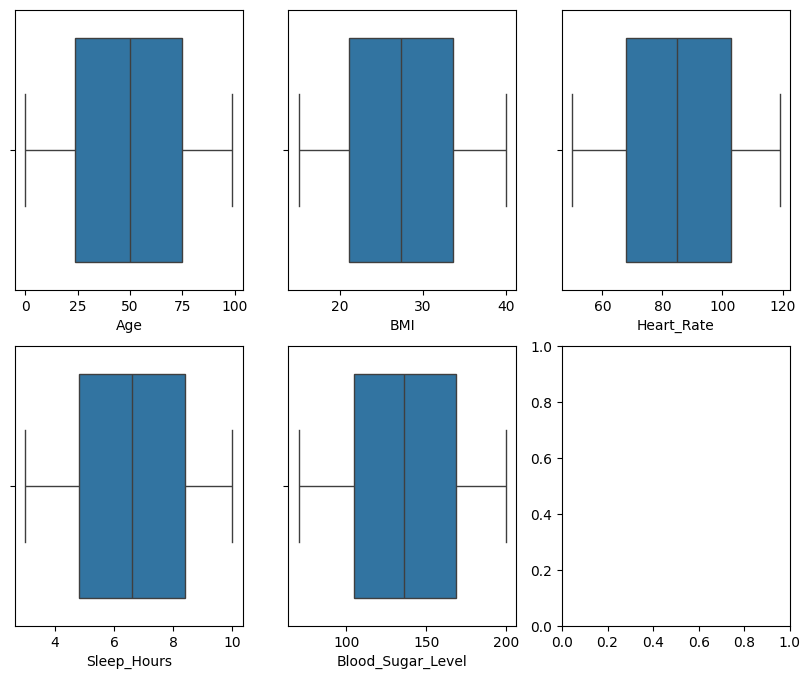

In [566]:
sel_col_o = ['Age', 'BMI', 'Heart_Rate', 'Sleep_Hours', 'Blood_Sugar_Level']

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
for ax, col in zip(axes.flatten(), sel_col_o):
    sns.boxplot(
        x= df[col],
        ax=ax
    )